<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries needed.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

##### *Project Start*

**Project Scenario:** You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. 

## Exploration

- I'll start by checking the first rows of the dataset.

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


The details regarding the different columns are as follows:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)·RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per USD 10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes (in USD 1000's)

From seeing the data for the first time, it seems that each row represents different cases which may determine the housing price which is stored in MEDV column. I think it would be better to drop the 'Unnamed:0' column.

In [14]:
boston_df.drop('Unnamed: 0',axis=1,inplace=True)
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [16]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


- Checking for the values stored in each column using *.info*, there are no null values which is good since we do not have to clean null values in the dataset. All variables are also numerical (as denoted by dtype: float64).

In [17]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


- Using the *.describe* method, we can explore the dataset further. As shown, we have 506 observations or rows in all 13 columns. We can see the minimum and maximum values for each column, for example, in the case of housing prices (MEDV), the cheapest is 5,000 USD and the priciest would be 50,000 USD. For easier exploration and analysis, we will now proceed to different visualizations.

<AxesSubplot:ylabel='MEDV'>

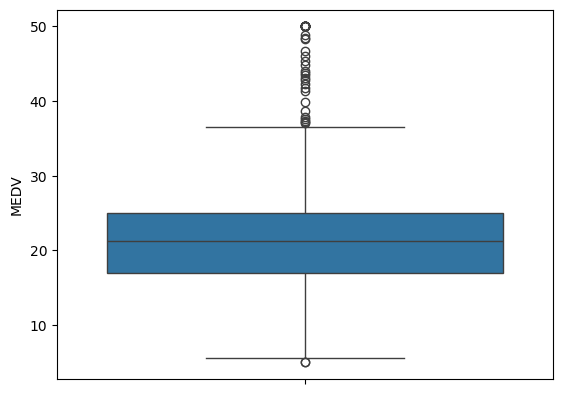

In [20]:
# Boxplot for "Median value of owner-occupied homes"
sns.boxplot(y='MEDV',data=boston_df)

- The boxplot for median value of owner-occupied homes can be seen above which also shows numerous outliers. 

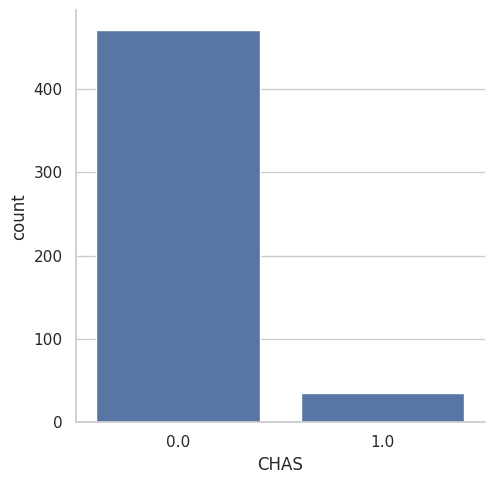

In [22]:
# bar plot for the Charles river variable
sns.set(style="whitegrid")
sns.catplot(x='CHAS', kind='count', data=boston_df)
pyplot.show()

- The bar plot above shows the number of areas or tracts that are bounded by the Charles River with 0 representing those that are bounded by the river and 1 for those that are not. From the graph, most observations are not bounded by the river which was easily discovered earlier with summary statistics showing the mean for CHAS column as 0.069170. This means that 6.9% of the dataset are only those that are bounded by the river.

- Next, would be to investigate the boxplot of MEDV using three different AGE groups. This would entail creating another column, age_group, to categorize or segment the AGE variable. Take note that AGE variable denotes the proportion of houses in that area (in this case, each row) which were built before 1940. Those categorized '35% or less' means that 35% or less of the total houses in that area were built before 1940 which can be understood as higher proportion of newer houses. Having a proportion of of 70% or more means that most houses were built before 1940.

In [28]:
#Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35% or less'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = '35%<x<70%'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70% or more'

In [29]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35%<x<70%
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70% or more
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35%<x<70%
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,35%<x<70%
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,35%<x<70%


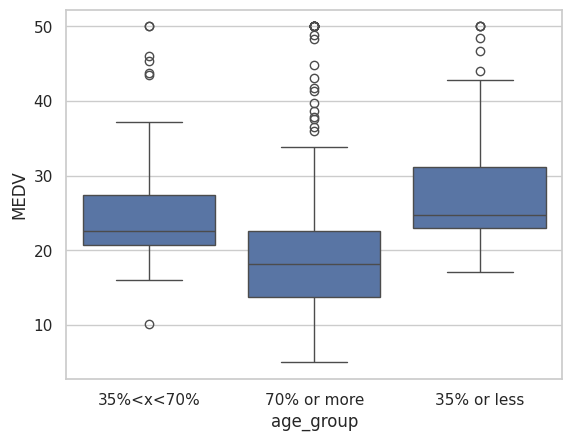

In [30]:
#Boxplot for the MEDV variable vs the AGE variable
sns.boxplot(x='age_group', y='MEDV', data=boston_df)
pyplot.show()

- The boxplot above shows that areas having more newer houses (at maximum 35% of the houses in that area were built before 1940) are more likely going to be pricier than housing areas that have more pre-1940 houses, at least in terms of median (since there are still overlapping areas between the groups). Areas that have 70% or more pre-1940 houses are the cheapest among the 3 groups in terms of median. 

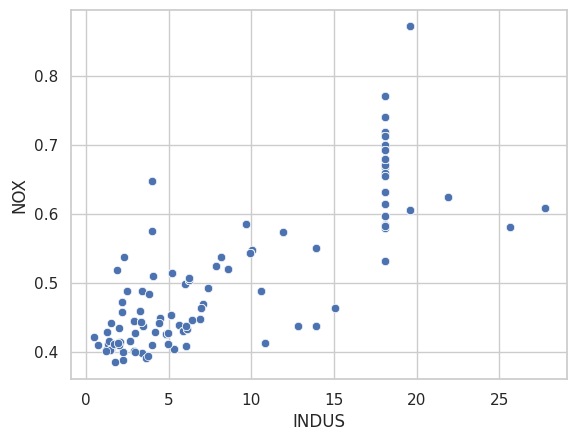

In [32]:
#Scatter plot for Nitric oxide concentrations and proportion of non-retail business acres per town
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.show()

- The scatterplot above shows the relationship of proportion of non-retail business acres per town and nitric oxide concentrations. It can be observed that the higher the proportion of non-retail businesses, the higher the nitric oxide concentrations measured. It may not necessarily mean causation but definitely shows a certain relationship between the two variables.

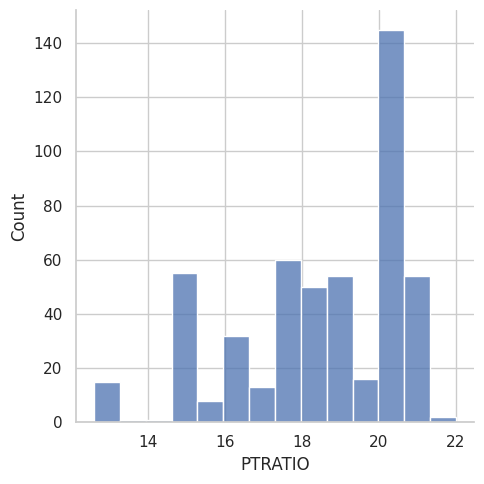

In [33]:
#Histogram for the pupil to teacher ratio variable
sns.displot(boston_df['PTRATIO'], kde = False)
pyplot.show()

- The histogram above is regarding the pupil-teacher ratio by town from which we can see that most towns have a pupil to teacher ratio of around 19 to 20.

## Hypothesis testing

Now, we would be answering questions that the management is interested in. These questions are as follows:

1. Is there a significant difference in median value of houses bounded by the Charles river or not?
2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

#### 1. Is there a significant difference in median value of houses bounded by the Charles river or not?

- as seen earlier, we have only a small proportion of records bounded by the Charles river (6.9%). We can check if there is a difference in the median housing price using a boxplot.

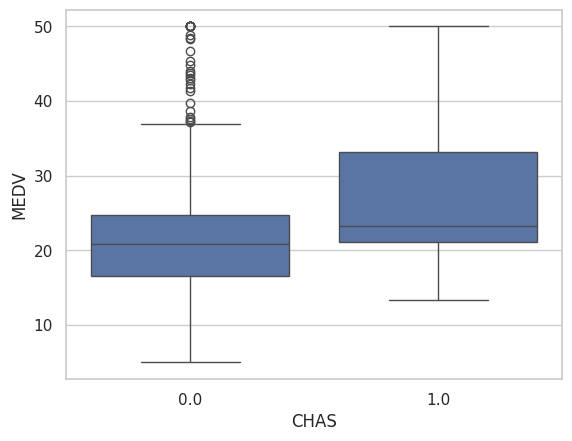

In [38]:
sns.boxplot(x='CHAS', y='MEDV', data=boston_df)
pyplot.show()

- The median of those not bounded by the river is lower than those bounded by the river.
- Null Hypothesis: There is no difference in the median value of houses bounded by the Charles river.
- Alternate Hypothesis: The median value of houses bounded and not bounded by the Charles river are not equal.
- Next would be to check if the variances between the 2 groups are equal which will be affect the t-test. As seen below, the p-value is less than alpha which is 0.05. This means that we assume that the variances are not equal.

In [37]:
#levene's test to check for equivalent variances
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean' )

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [42]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

- **Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in pricing based on whether or not they are bounded by the Charles river.

#### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

- Null Hypothesis: There is no difference in median values of houses in different 'AGE' groups.
- Alternate Hypothesis: There is a difference in the median values of houses of different 'AGE' groups.

- start off by testing for equality of variance.

In [44]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35% or less']['MEDV'],
                   boston_df[boston_df['age_group'] == '35%<x<70%']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70% or more']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

- Since p-value is greater than 0.05, we can assume equal variances and run a one-way ANOVA test.

In [45]:
f_statistic, p_value = scipy.stats.f_oneway(
                   boston_df[boston_df['age_group'] == '35% or less']['MEDV'],
                   boston_df[boston_df['age_group'] == '35%<x<70%']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70% or more']['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


- **Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

#### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

- Null Hypothesis: There is no correlation between nitric oxide concentrations and proportion of non-retain business acres per town.
- Alternate Hypothesis: There is a correlation between nitric oxide concentrations and proportion of non-retail business acres per town.

- In case you missed it, we used a scatterplot earlier to explore the possible relationship of 'NOX' and 'INDUS', the variables for nitric oxide concentrations and proportion of non-retain business acres per town. We saw that NOX increases with higher INDUS value. We will now use Pearson's correlation to check their relationship.

In [46]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

- **Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there exists a relationship between nitric oxide concentrations and proportion of non-retail business acres per town.

#### 4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

In [47]:
## X is independent variable, in this case DIS (the weighted distances to five Boston employment centres)
X = boston_df['DIS']
## y is dependent variable, MEDV
y = boston_df['MEDV']
## add an intercept (beta_0) to the model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        19:38:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **Conclusion:**  We found out that the coefficient for DIS variable is 1.0916. This means that for every additional weighted distance to the five Boston employment centres, the median value of owner occupied homes increases by 1,091.6 USD (1.0916 multiplied by 1000 USD).

##### *Project End* 

cheers! -PKC